In [21]:
#gerekli kütüphaneler
import matplotlib.pyplot as plt #görselleştirme
import seaborn as sns #görselleştirme
import plotly.express as px #görselleştirme
import pandas as pd #veriyi okumak için
import numpy as np
import warnings #uyarıları gizlemek için

In [3]:
#uyarıları gizleme
warnings.filterwarnings("ignore")

In [4]:
#veri okuma
netflix_data=pd.read_csv("D:/Project/AdaLovelaceAkademi/week-3/data/Netflix_TV_Shows _and _Movies.csv")

In [10]:
#veri hakkında bilgi
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [12]:
#veri sütunları
netflix_data.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [13]:
#ilk 10 veri
netflix_data.head(10)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
5,5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0
6,6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,tt0058385,7.8,94121.0
7,7,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,tt0080453,5.8,69053.0
8,8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,tt0061418,7.7,111189.0
9,9,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,tt0060862,7.3,16168.0


Burada analiz yaparken id ve imdb_id kolonlarını silebiliriz. Çünkü index adı verilen kolon id olarak kullanılabilir.

In [14]:
#id ve imdb_id kolonlarının silinmesi
netflix_data.drop(['id', 'imdb_id'], axis=1, inplace=False)

,index,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...,...,...
5278,5278,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,5.8,26.0
5279,5279,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,6.9,39.0
5280,5280,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,6.5,32.0
5281,5281,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,6.2,9.0


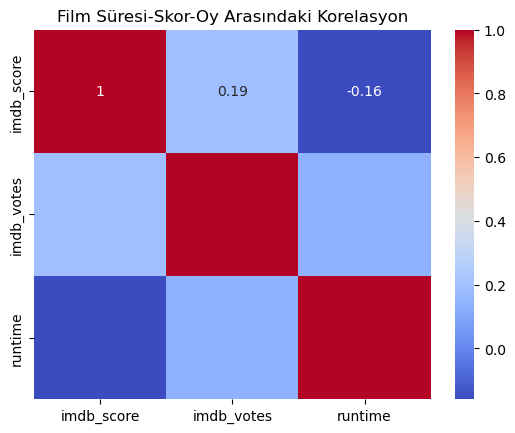

In [11]:
#Korelasyon Isı Haritası, skor, oy ve film süreleri arasındaki kolerasyon
corr=netflix_data[['imdb_score', 'imdb_votes', 'runtime']].corr()
#square'nin True olması tüm hücreleri kare şeklinde göstermesi anlamına gelir
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)#annot:değerleri gösterir, 
plt.title('Film Süresi-Skor-Oy Arasındaki Korelasyon')
plt.show()


Korelasyon katsayısı negatif ise iki değişken arasında ters ilişki vardır,pozitif ise doğrusal ilişki vardır.

# r<0.2 ise çok zayıf ilişki yada korelasyon yok

# 0.2-0.4 arasında ise zayıf korelasyon

# 0.4-0.6 arasında ise orta şiddette korelasyon

# 0.6-0.8 arasında ise yüksek korelasyon

# 0.8> ise çok yüksek korelasyon olduğu yorumu yapılır.

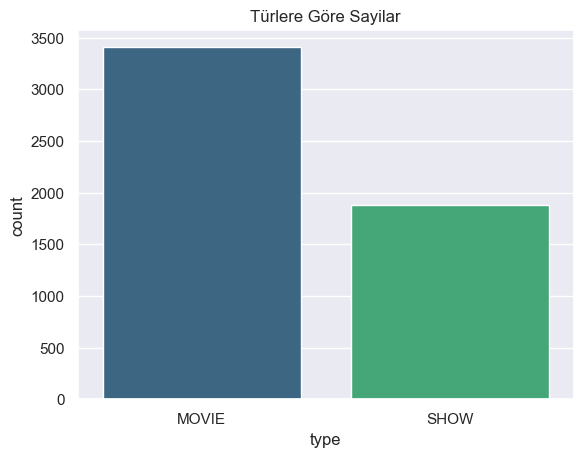

In [119]:
#type kolonunda iki değer var bunların sayısını sütun grafiğinde görme
sns.countplot(data=netflix_data, x='type', palette='viridis')
plt.title("Türlere Göre Sayilar")
plt.show()


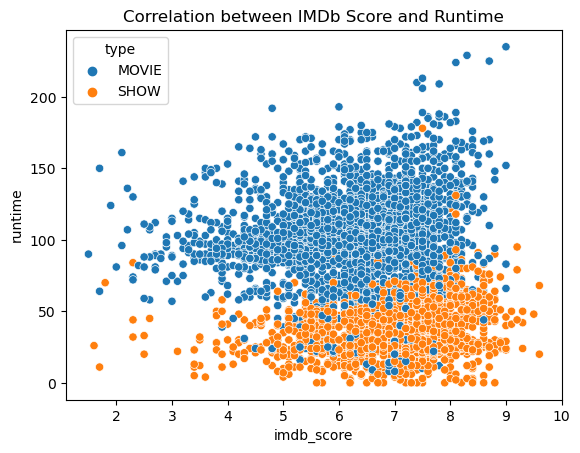

In [23]:
#imdb_score ve runtime kolonları için türler arasındaki korelasyon
sns.scatterplot(data=netflix_data, x='imdb_score', y='runtime', hue='type')
plt.title('IMDb Score ve Runtime Arasindaki Korelasyon')
plt.show()

In [25]:
#Netflix datası içerinden sadece "show" olanları alarak top 10 da bulunan filmlerin skorlarını çubuk grafikte gösterme
show_data=netflix_data[netflix_data['type']=='SHOW']
show_data

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
28,28,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,tt0202477,8.1,2144.0
43,43,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,tt0098904,8.9,302700.0
51,51,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,tt0083437,6.9,33760.0
53,53,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,tt0086815,6.5,4948.0
...,...,...,...,...,...,...,...,...,...,...,...
5252,5252,ts309235,Christmas Flow,SHOW,An unlikely Christmas romance blossoms between...,2021,TV-MA,50,tt15340790,5.8,702.0
5254,5254,ts307816,Korean Cold Noodle Rhapsody,SHOW,"Refreshing and flavorful, naengmyeon is Koreaâ...",2021,TV-PG,49,tt15772846,7.3,15.0
5266,5266,ts273317,Pitta Kathalu,SHOW,"Four different women, four journeys of love an...",2021,TV-MA,37,tt13879000,5.1,727.0
5275,5275,ts286386,The Big Day,SHOW,"For six engaged couples, happily ever after be...",2021,TV-MA,45,tt13887518,4.6,327.0


In [28]:
#top10'u almak için sort_values fonksiyonu kullanıldı
top10=show_data.sort_values(by='imdb_score', ascending=False)#siralama yapildi
top_10=top10.head(10)
top_10 #ilk 10 veri alindi

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
2787,2787,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,tt12635254,9.6,7.0
622,622,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,20,tt3062514,9.6,3046.0
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0
245,245,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,tt0417299,9.3,297336.0
3597,3597,ts90621,Kota Factory,SHOW,"Dedicated to Shrimati SL Loney ji, Shri Irodov...",2019,TV-MA,42,tt9432978,9.3,66985.0
3144,3144,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,tt9253866,9.3,41386.0
1953,1953,ts78298,My Mister,SHOW,"In a world that is less than kind, a young wom...",2018,TV-14,79,tt7923710,9.2,5481.0
1346,1346,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,tt5182866,9.2,6557.0
4628,4628,ts296563,Who Rules The World,SHOW,A legendary wuxia romance that focuses on the ...,2022,TV-PG,44,tt14950036,9.2,81.0
4429,4429,ts222333,Arcane,SHOW,Amid the stark discord of twin cities Piltover...,2021,TV-14,41,tt11126994,9.1,175412.0


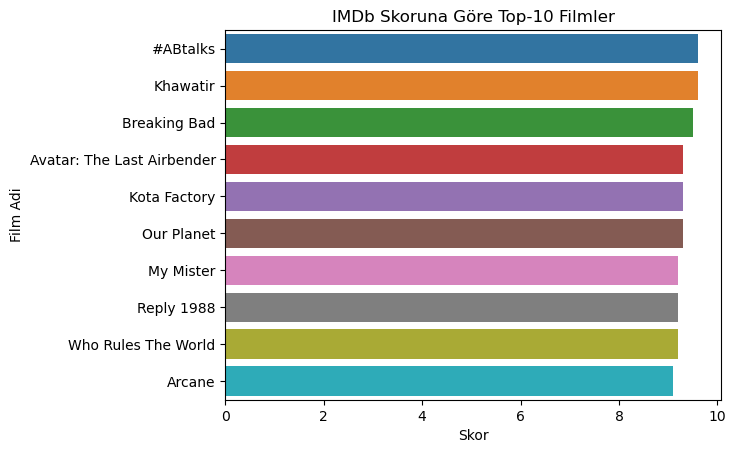

In [30]:
#Skora göre top 10'da olan filmler ve skor değerleri
sns.barplot(x='imdb_score', y='title', data=top_10)
plt.title('IMDb Skoruna Göre Top-10 Filmler')
plt.xlabel('Skor')
plt.ylabel('Film Adi')
plt.show()

In [98]:
#veri setinde 2000 yılından büyük olan filmler
year=netflix_data[netflix_data['release_year']>=2000]
year


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
98,98,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,tt0239195,7.4,24368.0
109,109,ts21567,Gilmore Girls,SHOW,"Set in the charming town of Stars Hollow, Conn...",2000,TV-14,46,tt0238784,8.2,119054.0
127,127,ts21034,InuYasha,SHOW,Kagome Higurashi is a modern day young girl wh...,2000,TV-14,25,tt0290223,7.9,15823.0
132,132,tm19673,The Patriot,MOVIE,After proving himself on the field of battle i...,2000,R,165,tt0187393,7.2,270231.0
133,133,tm24877,Road Trip,MOVIE,From the director of the Hangover trilogy and ...,2000,R,93,tt0215129,6.5,167670.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


Text(0, 0.5, 'Count')

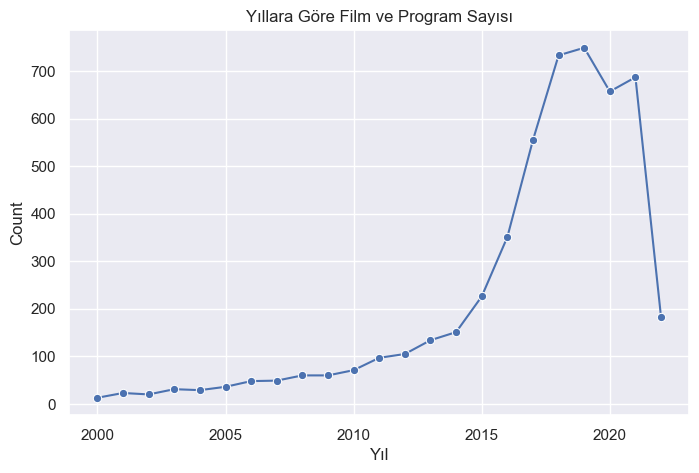

In [115]:
# 2000 yılı dahil ve sonrası için show ve movie sayıları
counts = year['release_year'].value_counts()
plt.figure(figsize=(8, 5))
sns.lineplot(x=counts.index, y=counts.values, palette='viridis', marker='o')
plt.title("Yıllara Göre Film ve Program Sayısı")
plt.xlabel('Yıl')
plt.ylabel('Count')

<Figure size 2000x1000 with 0 Axes>

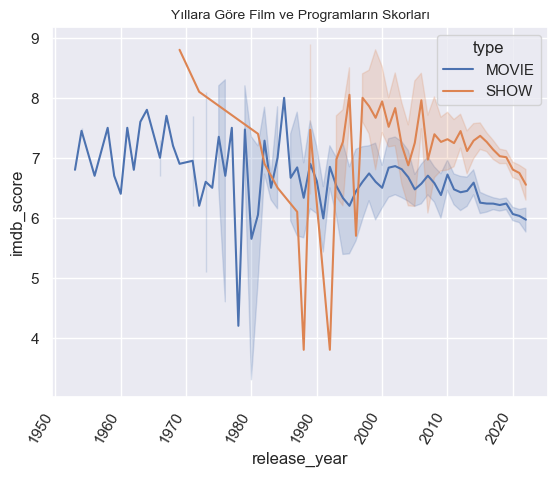

<Figure size 2000x1000 with 0 Axes>

In [106]:
#Yıllara göre film ve programların ayrı ayrı skorları
sns.lineplot(
    x="release_year",
    y="imdb_score",
    data=netflix_data,
    hue="type"
)
plt.title('Yıllara Göre Film ve Programların Skorları', fontsize=10)
plt.figure(figsize=(20, 10))


In [112]:
#film süresi 100'den büyük olan filmlerin ortalama oyları
#film_suresi=netflix_data[netflix_data['runtime']>100]
yas=netflix_data['age_certification'].value_counts()
yas


age_certification
TV-MA    792
R        548
TV-14    436
PG-13    424
PG       238
TV-PG    172
G        105
TV-Y7    104
TV-Y      94
TV-G      72
NC-17     13
Name: count, dtype: int64

<class 'list'>


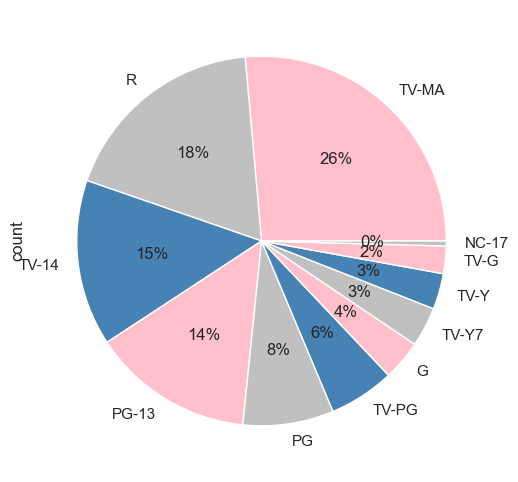

In [144]:
#Hangi yaş aralığının ne kadar yüzdeye ait olduğunu görmek için pasta grafiği cizildi
# İstediğimiz renkleri yazabileceğimiz bir liste oluşturduk
color = ['pink', 'silver', 'steelblue'] 
plot=yas.plot.pie(
                y=yas.values,
                figsize=(11,6),
                autopct='%1.0f%%', #yüzdelik değerler
                colors=color)

In [114]:
# null degerler
print(netflix_data.isnull().sum())

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64


In [136]:
#age_certification kolonunda bulunan null değerler temizlendi
age_certification_null = netflix_data.dropna(subset=['age_certification'])
age_certification_null.isnull().sum()

index                0
id                   0
title                0
type                 0
description          2
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           9
dtype: int64

In [138]:
#null olan değerleri, ait oldukları kolonun ortalamasıyla doldurduk ve
#son durumda dataFrame aşağıdaki gibi oldu.
avg_imdb_votes=netflix_data.fillna(netflix_data['imdb_votes'].mean())

In [139]:
avg_imdb_votes['imdb_votes'].isnull().sum()#burada null olan değer kaldı mı diye kontrol edildi

0

<Axes: ylabel='imdb_votes'>

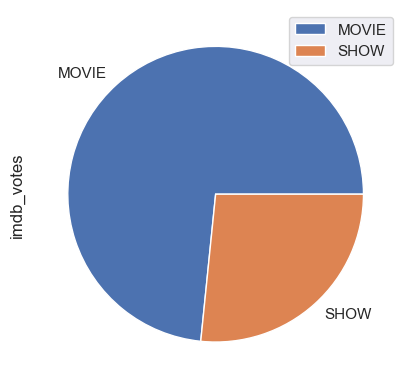

In [147]:
#Türlerine göre dağılım
netflix_data.groupby(['type']).sum().plot(kind='pie', y='imdb_votes')

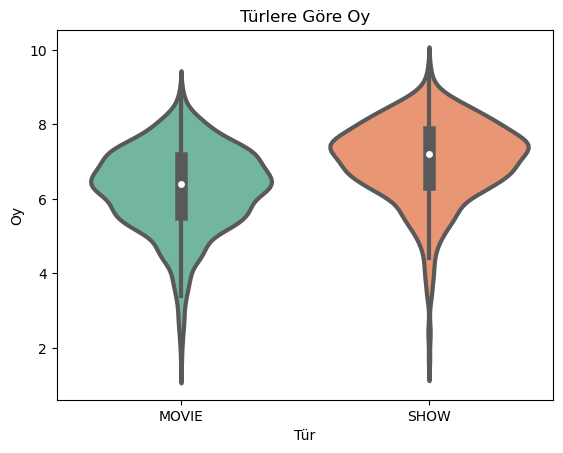

In [19]:
#Türlere göre oy değerleri beyaz ile gösterilen nokta ortalamayı gösterir.
#Şeklin en üst ve en altı max ve min değerleri ele alır

sns.violinplot(x='type', y='imdb_score', data=netflix_data, linewidth=3, palette='Set2')
plt.xlabel('Tür')
plt.ylabel('Oy')
plt.title('Türlere Göre Oy')
plt.show()

In [20]:
#Pandas ile temel işlemlere örnekler
#Rasgele 5 satırı görüntüleme
netflix_data.sample(5)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
4717,4717,ts299874,Cocaine Cowboys: The Kings of Miami,SHOW,Two childhood friends go from high school drop...,2021,TV-MA,53,tt15049206,7.1,2624.0
4987,4987,tm1082359,Phil Wang: Philly Philly Wang Wang,MOVIE,"Phil Wang explores race, romance, politics and...",2021,NaN,63,tt15091640,6.0,561.0
857,857,tm181366,Here Comes the Rain,MOVIE,Abducted during the Lebanese Civil War and now...,2011,NaN,100,tt2091312,6.3,63.0
29,29,tm90896,The Return of the Prodigal Son,MOVIE,"In this Andre Gide adaptation, an activist is ...",1976,NaN,124,tt0074168,7.2,768.0
3762,3762,tm925490,Ainu Mosir,MOVIE,"Kanto, 14, a descendant of Japan's indigenous ...",2020,NaN,84,tt9140354,6.6,231.0


In [22]:
#Tür bazında ortalama oylar
tur_ortalama_oy=netflix_data.groupby('type')['imdb_votes'].apply(lambda x: np.mean(x))

type
MOVIE    26683.217045
SHOW     17485.558102
Name: imdb_votes, dtype: float64

In [23]:
#runtime özniteliğinin ortanca değeri(medyan)
netflix_data['runtime'].median()

87.0

<Axes: xlabel='age_certification', ylabel='imdb_score'>

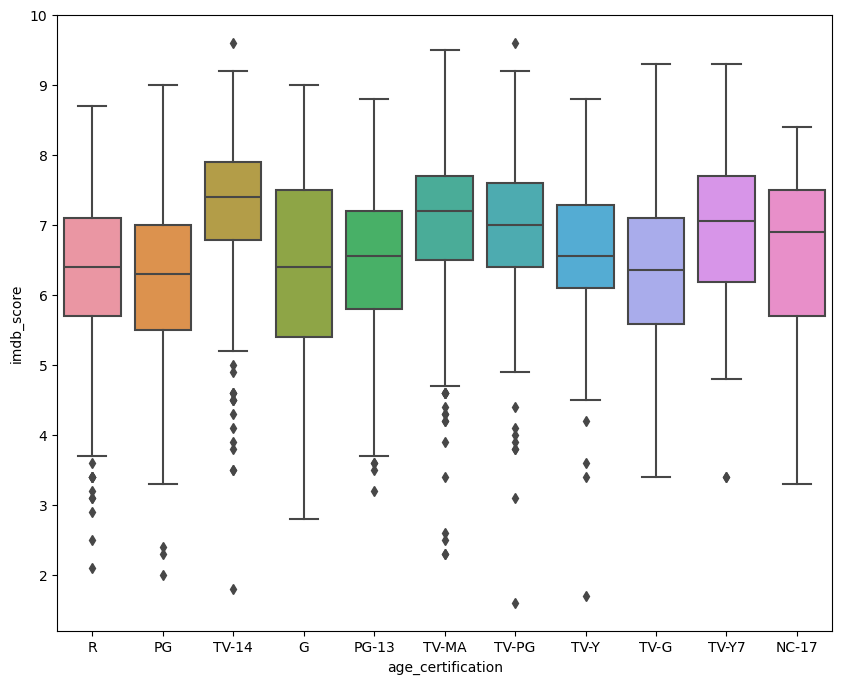

In [28]:
plt.figure(figsize = (10,8))
sns.boxplot(data =netflix_data, x='age_certification', y='imdb_score')

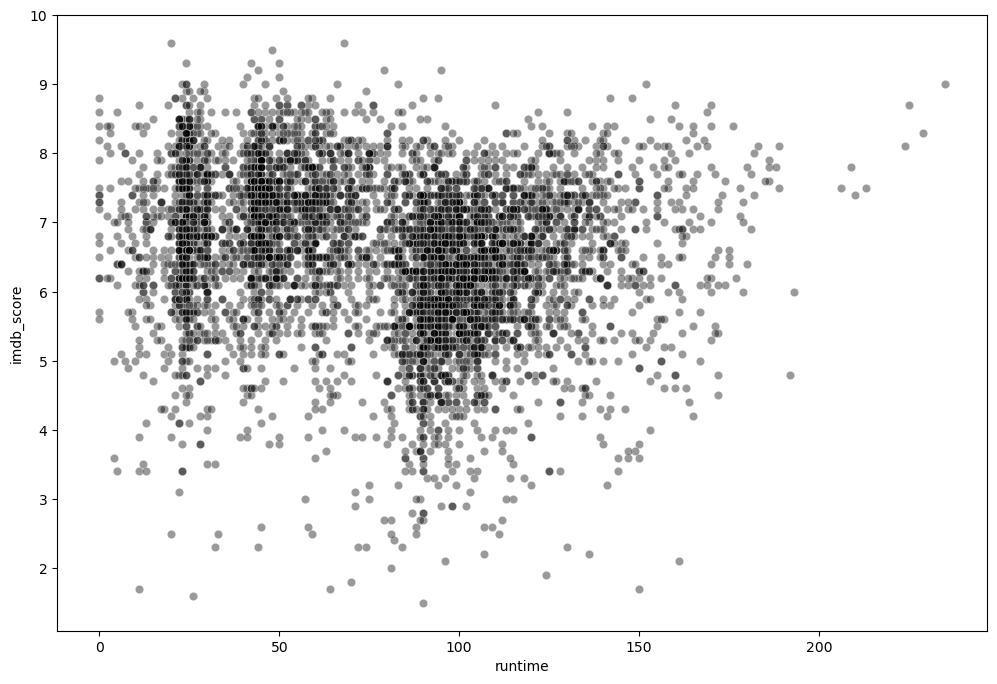

In [31]:
#Aykırı değerleri tespit edebilmek için bir saçılım grafiği ele alalım
plt.figure(figsize=(12,8))
sns.scatterplot(x='runtime', y='imdb_score', 
                data=netflix_data, 
                color='black',
                alpha=0.4)
plt.show()
#film süresi 0 olanların yüksek skor elde etmesi de anormal bir durumu gösterebilir?
#Bu satırları veri setinden çıkarabiliriz

In [46]:
#Aykırı değerleri veri setinden silmek için
aykiri_degerler=netflix_data[(netflix_data['runtime']<=0)]
aykiri_degerler['runtime']
#Not: drop komutu kullanılmasına ragmen silinmedi?

450     0
455     0
535     0
840     0
2503    0
2996    0
3528    0
3733    0
3743    0
3757    0
4025    0
4132    0
4161    0
4961    0
5098    0
5128    0
5210    0
5282    0
Name: runtime, dtype: int64